In [1]:
import tensorflow as tf
import utils

from CRNN import CRNN

In [2]:
ckpt_states = tf.train.get_checkpoint_state(utils.CRNN_CHECKPOINT_DIR)
ckpt = ckpt_states.model_checkpoint_path
ckpt

'./checkpoint/crnn/crnn-model-e7-39806'

In [3]:
with tf.gfile.GFile('./checkpoint/crnn/frozen_model.pb', 'rb') as f:
    graph_def = tf.GraphDef()
    graph_def.ParseFromString(f.read())
    
with tf.Graph().as_default() as graph:
    tf.import_graph_def(graph_def, name='prefix')
    for op in graph.get_operations():
        print(op.name)

prefix/inputs
prefix/sequence_length
prefix/conv2d/kernel
prefix/conv2d/kernel/read
prefix/conv2d/bias
prefix/conv2d/bias/read
prefix/conv2d/Conv2D
prefix/conv2d/BiasAdd
prefix/conv2d/Relu
prefix/max_pooling2d/MaxPool
prefix/conv2d_1/kernel
prefix/conv2d_1/kernel/read
prefix/conv2d_1/bias
prefix/conv2d_1/bias/read
prefix/conv2d_1/Conv2D
prefix/conv2d_1/BiasAdd
prefix/conv2d_1/Relu
prefix/max_pooling2d_1/MaxPool
prefix/conv2d_2/kernel
prefix/conv2d_2/kernel/read
prefix/conv2d_2/bias
prefix/conv2d_2/bias/read
prefix/conv2d_2/Conv2D
prefix/conv2d_2/BiasAdd
prefix/conv2d_2/Relu
prefix/batch_normalization/gamma
prefix/batch_normalization/gamma/read
prefix/batch_normalization/beta
prefix/batch_normalization/beta/read
prefix/batch_normalization/moving_mean
prefix/batch_normalization/moving_mean/read
prefix/batch_normalization/moving_variance
prefix/batch_normalization/moving_variance/read
prefix/batch_normalization/FusedBatchNorm
prefix/conv2d_3/kernel
prefix/conv2d_3/kernel/read
prefix/conv2

In [23]:
import matplotlib.pyplot as plt
from DataManager import resize_image
import numpy as np

file_name = './dataset/iamdataset/line/a06/a06-000/a06-000-03.png'

inputs = resize_image(file_name)
inputs = np.swapaxes(inputs, axis1=0, axis2=1)
inputs = np.reshape(inputs, [1, 512, 32, 1])
inputs.shape

(1, 512, 32, 1)

In [24]:
x = graph.get_tensor_by_name('prefix/inputs:0')
y = graph.get_tensor_by_name('prefix/CTCBeamSearchDecoder:1')
seq_len = graph.get_tensor_by_name('prefix/sequence_length:0')

In [25]:
with tf.Session(graph=graph) as sess:
    y_out = sess.run(y, feed_dict={
        x: inputs,
        seq_len: [127]
    })

C:\Users\Dell\Miniconda3\envs\tensorflow-gpu\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


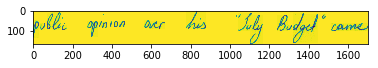

publie apinson aer his "buly Budget" came


In [26]:
from scipy.misc import imread

img = imread(file_name)
plt.imshow(img)
plt.show()

print(utils.decode_result(y_out))